In [1]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve


# Mount du drive où se situe le dataset
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

# PATH génétrique des fichiers
path = "/content/drive/MyDrive/Accidentsroute/data/"



Mounted at /content/drive/


In [2]:
# PATH génétrique des fichiers
df = pd.read_csv(path + "merged_data_2018_2021_for_model.csv", sep=',', index_col=0)
df.head()

,mois,lum,agg,int,atm,col,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,catv,obs,obsm,choc,manv,place,catu,grav,sexe_usagers,trajet,secu1,nb_veh,weekend,heure,periode,age_usagers,age_conducteur,sexe_conducteur
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,1,1.0,1,3.0,1.0,3.0,3,2.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1,3.0,1.0,2.0,1.0,2,0,15,Après-midi,75-plus,95.0,1.0
201800000001,1,1.0,1,3.0,1.0,3.0,3,2.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,15.0,1.0,1,1.0,1.0,2.0,1.0,2,0,15,Après-midi,55-64,63.0,1.0
201800000002,2,1.0,2,3.0,1.0,1.0,4,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1,1.0,1.0,2.0,1.0,1,0,10,Matin,75-plus,76.0,1.0
201800000003,3,1.0,2,3.0,1.0,1.0,3,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1,3.0,1.0,2.0,2.0,1,1,12,Après-midi,35-44,36.0,1.0
201800000004,5,1.0,2,1.0,1.0,4.0,3,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,9.0,1.0,21.0,1.0,1,1.0,1.0,2.0,1.0,1,1,18,Soir,35-44,41.0,1.0


In [3]:
#  1.1 Séparation de la variable cible et des variables explicatives en 3 tableaux :
# cible, catégorielle et quantitative

V = df.drop(['grav','nb_veh','age_conducteur'], axis=1)
W = df[['nb_veh','age_conducteur']]
y = df['grav']

In [4]:
# 1.2 Encodage des variables du tableau V (get_dummies avec utilisation de l'argument "drop")

V = V.apply(lambda x: x.astype('object') if x.dtype == 'int64' or x.dtype == 'float64' else x)
V = pd.get_dummies(V, drop_first=True).astype('float64')
#V = pd.get_dummies(V, drop_first=True)
# print(V.info())
# V.head()

<ipython-input-4-6023c61f710a>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  V = pd.get_dummies(V, drop_first=True).astype('float64')
<ipython-input-4-6023c61f710a>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  V = pd.get_dummies(V, drop_first=True).astype('float64')
<ipython-input-4-6023c61f710a>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  V = pd.get_dummies(V, drop_first=True).astype('float64')
<ipython-input-4-6023c61f710a>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  V = pd.get_dummies(V, drop_first=True).astype('float64')
<ipython-input-4-6023c61f710

In [5]:
# 1.3 Concaténation des variables du tableau V et du tableau W

X =pd.concat([V,W], axis=1)
print(X.shape)
X.head()

(427779, 174)


,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,circ_3.0,circ_4.0,nbv_1.0,nbv_2.0,nbv_3.0,nbv_4.0,nbv_5.0,nbv_6.0,nbv_7.0,nbv_8.0,nbv_9.0,vosp_1.0,vosp_2.0,vosp_3.0,prof_2.0,prof_3.0,prof_4.0,plan_2.0,plan_3.0,plan_4.0,surf_2.0,surf_3.0,infra_1.0,infra_2.0,infra_3.0,infra_4.0,infra_5.0,infra_6.0,infra_7.0,infra_8.0,infra_9.0,situ_1.0,situ_2.0,situ_3.0,situ_4.0,situ_5.0,situ_6.0,situ_8.0,catv_1.0,catv_2.0,catv_3.0,catv_4.0,catv_5.0,catv_6.0,obs_1.0,obs_2.0,obs_3.0,obs_4.0,obs_5.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,obs_10.0,obs_11.0,obs_12.0,obs_13.0,obs_14.0,obs_15.0,obs_16.0,obs_17.0,obsm_1.0,obsm_2.0,obsm_4.0,obsm_5.0,obsm_6.0,obsm_9.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,manv_1.0,manv_2.0,manv_3.0,manv_4.0,manv_5.0,manv_6.0,manv_7.0,manv_8.0,manv_9.0,manv_10.0,manv_11.0,manv_12.0,manv_13.0,manv_14.0,manv_15.0,manv_16.0,manv_17.0,manv_18.0,manv_19.0,manv_20.0,manv_21.0,manv_22.0,manv_23.0,manv_24.0,manv_25.0,manv_26.0,place_2.0,place_3.0,catu_2,catu_3,sexe_usagers_2.0,trajet_2.0,trajet_3.0,secu1_2.0,secu1_3.0,secu1_4.0,weekend_1,heure_1,heure_2,heure_3,heure_4,heure_5,heure_6,heure_7,heure_8,heure_9,heure_10,heure_11,heure_12,heure_13,heure_14,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_usagers_14-17,age_usagers_18-24,age_usagers_25-34,age_usagers_35-44,age_usagers_45-54,age_usagers_55-64,age_usagers_65-74,age_usagers_75-plus,sexe_conducteur_1.0,sexe_conducteur_2.0,nb_veh,age_conducteur
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,95.0
201800000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,63.0
201800000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,76.0
201800000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [6]:
# 1.4 Division des données en ensemble d'entrainement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

In [7]:
# 1.5 Standardisation des données de W

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['nb_veh', 'age_conducteur']] = scaler.fit_transform(X_train[['nb_veh', 'age_conducteur']])
X_test[['nb_veh', 'age_conducteur']] = scaler.transform(X_test[['nb_veh', 'age_conducteur']])

In [ ]:
# Test DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dum = dummy_clf.predict(X_test)
print(dummy_clf.score(X_test, y_test))
print(classification_report(y_test,y_pred_dum))

0.42222637804478935
              precision    recall  f1-score   support

         1.0       0.42      1.00      0.59     18062
         2.0       0.00      0.00      0.00      1105
         3.0       0.00      0.00      0.00      6746
         4.0       0.00      0.00      0.00     16865

    accuracy                           0.42     42778
   macro avg       0.11      0.25      0.15     42778
weighted avg       0.18      0.42      0.25     42778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# KNN supervisé : distance euclidienne
# Paramètre k=4 clusters / variable cible

knn_eucli =  KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn_eucli.fit(X_train, y_train)
y_pred_eucli = knn_eucli.predict(X_test)
print(accuracy_score(y_test, y_pred_eucli))
print(confusion_matrix(y_test, y_pred_eucli))
print(pd.crosstab(y_test, y_pred_eucli, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test,y_pred_eucli))

0.5975501425966618
[[14929    42   668  2423]
 [  252    94   451   308]
 [ 1590   176  2560  2420]
 [ 6189   103  2594  7979]]
Classe prédite    1.0  2.0   3.0   4.0
Classe réelle                         
1.0             14929   42   668  2423
2.0               252   94   451   308
3.0              1590  176  2560  2420
4.0              6189  103  2594  7979
              precision    recall  f1-score   support

         1.0       0.65      0.83      0.73     18062
         2.0       0.23      0.09      0.12      1105
         3.0       0.41      0.38      0.39      6746
         4.0       0.61      0.47      0.53     16865

    accuracy                           0.60     42778
   macro avg       0.47      0.44      0.44     42778
weighted avg       0.58      0.60      0.58     42778



In [ ]:
# KNN supervisé : distance minkowski
# Paramètre k=4 clusters / variable cible

knn_minko =  KNeighborsClassifier(n_neighbors=4, metric='minkowski')
knn_minko.fit(X_train, y_train)
y_pred_minko = knn_minko.predict(X_test)
print(accuracy_score(y_test, y_pred_minko))
print(confusion_matrix(y_test, y_pred_minko))
print(pd.crosstab(y_test, y_pred_minko, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test,y_pred_minko))

0.5975501425966618
[[14929    42   668  2423]
 [  252    94   451   308]
 [ 1590   176  2560  2420]
 [ 6189   103  2594  7979]]
Classe prédite    1.0  2.0   3.0   4.0
Classe réelle                         
1.0             14929   42   668  2423
2.0               252   94   451   308
3.0              1590  176  2560  2420
4.0              6189  103  2594  7979
              precision    recall  f1-score   support

         1.0       0.65      0.83      0.73     18062
         2.0       0.23      0.09      0.12      1105
         3.0       0.41      0.38      0.39      6746
         4.0       0.61      0.47      0.53     16865

    accuracy                           0.60     42778
   macro avg       0.47      0.44      0.44     42778
weighted avg       0.58      0.60      0.58     42778



In [ ]:
# KNN supervisé : distance Manhattan
# Paramètre k=4 clusters / variable cible

knn_man=  KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn_man.fit(X_train, y_train)
y_pred_man = knn_man.predict(X_test)
print(accuracy_score(y_test, y_pred_man))
print (confusion_matrix(y_test, y_pred_man))
print(pd.crosstab(y_test, y_pred_man, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test,y_pred_man))

0.5977137781102436
[[14946    43   667  2406]
 [  253    93   444   315]
 [ 1609   170  2582  2385]
 [ 6226   101  2590  7948]]
Classe prédite    1.0  2.0   3.0   4.0
Classe réelle                         
1.0             14946   43   667  2406
2.0               253   93   444   315
3.0              1609  170  2582  2385
4.0              6226  101  2590  7948
              precision    recall  f1-score   support

         1.0       0.65      0.83      0.73     18062
         2.0       0.23      0.08      0.12      1105
         3.0       0.41      0.38      0.40      6746
         4.0       0.61      0.47      0.53     16865

    accuracy                           0.60     42778
   macro avg       0.47      0.44      0.44     42778
weighted avg       0.58      0.60      0.58     42778



In [ ]:
# KNN supervisé : distance Chebyshev
# Paramètre k=4 clusters / variable cible

knn_cheb =  KNeighborsClassifier(n_neighbors=4, metric='chebyshev')
knn_cheb.fit(X_train, y_train)
y_pred_cheb = knn_cheb.predict(X_test)
print(accuracy_score(y_test, y_pred_cheb))
print(confusion_matrix(y_test, y_pred_cheb))
print(pd.crosstab(y_test, y_pred_cheb, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test,y_pred_cheb))

0.2913179671793913
[[3741    1 9354 4966]
 [ 189    0  530  386]
 [ 986    2 3511 2247]
 [2617    0 9038 5210]]
Classe prédite   1.0  2.0   3.0   4.0
Classe réelle                        
1.0             3741    1  9354  4966
2.0              189    0   530   386
3.0              986    2  3511  2247
4.0             2617    0  9038  5210
              precision    recall  f1-score   support

         1.0       0.50      0.21      0.29     18062
         2.0       0.00      0.00      0.00      1105
         3.0       0.16      0.52      0.24      6746
         4.0       0.41      0.31      0.35     16865

    accuracy                           0.29     42778
   macro avg       0.26      0.26      0.22     42778
weighted avg       0.39      0.29      0.30     42778



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

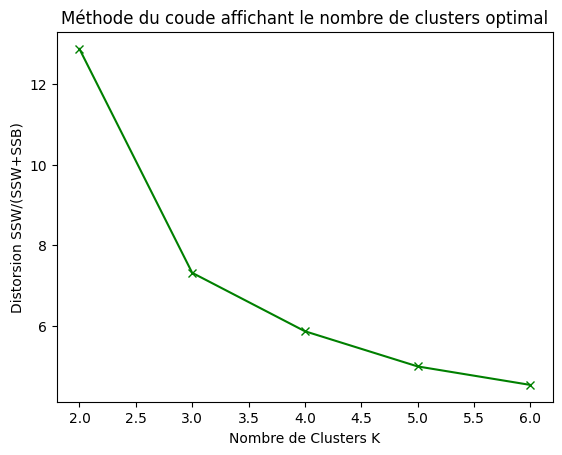

In [ ]:
# Test KNN non supervisé
# recherche meilleurs k entre 2 et 6

from scipy.spatial.distance import cdist
distorsions = []
for i in [2,3,4,5,6] :
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    distorsions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / np.size(X, axis = 0))

plt.plot([2,3,4,5,6], distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()


In [ ]:
# Nouvel modèle avec k optimal

kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(kmeans.labels_)
print(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 ... 2 1 2]
[[ 7.00137377e-02  6.55416663e-02  5.91989244e-02  7.80225455e-02
   9.27638181e-02  1.05264183e-01  9.82296833e-02  9.19648860e-02
   9.31243119e-02  7.65903134e-02  9.05716262e-02  6.23849099e-02
   1.34493409e-01  5.87215137e-01  1.80246890e-03  3.18842133e-01
   1.44168282e-01  6.98578485e-03  6.83963873e-03  2.76703333e-03
   3.70821439e-01  1.11080799e-01  4.50500307e-01  7.80128024e-02
   3.77407757e-01  3.86264213e-01  3.41981936e-02  6.42857839e-01
   1.75141518e-01  6.01147734e-03  9.47514054e-02  6.15109561e-01
   7.94645206e-02  1.30118768e-01  2.02558532e-02  2.72318949e-02
   2.72806103e-03  7.90163391e-03  3.66339624e-03  2.92779407e-02
   1.53648294e-02  3.36330953e-02  1.63693405e-01  1.98271578e-02
   1.73134445e-02  9.14095307e-02  9.37088964e-02  1.47607588e-02
   1.98252092e-01  1.68944922e-02  1.06199519e-02  1.88918226e-02
   1.64560539e-02  3.54647934e-03  5.61883142e-02  1.03081735e-02
   1.08148134e-03  6.33299882e-03  3.23470094e-02  8.03501

In [8]:
# Création variable cible binaire
y_bin = y.replace([1, 2], 0) \
         .replace([3, 4], 1)
y_train_bin = y_train.replace([1, 2], 0) \
                         .replace([3, 4], 1)
y_test_bin = y_test.replace([1, 2], 0) \
                         .replace([3, 4], 1)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(y_train_bin.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test_bin.shape)


(385001, 174)
(385001,)
(385001,)
(42778, 174)
(42778,)
(42778,)


In [ ]:
# Test DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train_bin)
y_pred_dum = dummy_clf.predict(X_test)
print(dummy_clf.score(X_test, y_test_bin))
print(classification_report(y_test_bin,y_pred_dum))

0.5519425873112348
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     19167
         1.0       0.55      1.00      0.71     23611

    accuracy                           0.55     42778
   macro avg       0.28      0.50      0.36     42778
weighted avg       0.30      0.55      0.39     42778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# KNN supervisé : distance euclidienne
# Paramètre k=2 clusters / variable cible

knn_eucli =  KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn_eucli.fit(X_train, y_train_bin)
y_pred_eucli = knn_eucli.predict(X_test)
print(accuracy_score(y_test_bin, y_pred_eucli))
print(confusion_matrix(y_test_bin, y_pred_eucli))
print(pd.crosstab(y_test_bin, y_pred_eucli, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test_bin,y_pred_eucli))

0.6739211744354575
[[16070  3097]
 [10852 12759]]
Classe prédite    0.0    1.0
Classe réelle               
0.0             16070   3097
1.0             10852  12759
              precision    recall  f1-score   support

         0.0       0.60      0.84      0.70     19167
         1.0       0.80      0.54      0.65     23611

    accuracy                           0.67     42778
   macro avg       0.70      0.69      0.67     42778
weighted avg       0.71      0.67      0.67     42778



In [ ]:
# KNN supervisé : distance minkowski
# Paramètre k=2 clusters / variable cible

knn_minko =  KNeighborsClassifier(n_neighbors=2, metric='minkowski')
knn_minko.fit(X_train, y_train_bin)
y_pred_minko = knn_minko.predict(X_test)
print(accuracy_score(y_test_bin, y_pred_minko))
print(confusion_matrix(y_test_bin, y_pred_minko))
print(pd.crosstab(y_test_bin, y_pred_minko, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test_bin,y_pred_minko))

0.6739211744354575
[[16070  3097]
 [10852 12759]]
Classe prédite    0.0    1.0
Classe réelle               
0.0             16070   3097
1.0             10852  12759
              precision    recall  f1-score   support

         0.0       0.60      0.84      0.70     19167
         1.0       0.80      0.54      0.65     23611

    accuracy                           0.67     42778
   macro avg       0.70      0.69      0.67     42778
weighted avg       0.71      0.67      0.67     42778



In [ ]:
# KNN supervisé : distance Manhattan
# Paramètre k=2 clusters / variable cible

knn_man=  KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn_man.fit(X_train, y_train_bin)
y_pred_man = knn_man.predict(X_test)
print(accuracy_score(y_test_bin, y_pred_man))
print (confusion_matrix(y_test_bin, y_pred_man))
print(pd.crosstab(y_test_bin, y_pred_man, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test_bin,y_pred_man))

0.6736172799102342
[[16072  3095]
 [10867 12744]]
Classe prédite    0.0    1.0
Classe réelle               
0.0             16072   3095
1.0             10867  12744
              precision    recall  f1-score   support

         0.0       0.60      0.84      0.70     19167
         1.0       0.80      0.54      0.65     23611

    accuracy                           0.67     42778
   macro avg       0.70      0.69      0.67     42778
weighted avg       0.71      0.67      0.67     42778



In [ ]:
# KNN supervisé : distance Chebyshev
# Paramètre k=2 clusters / variable cible

knn_cheb =  KNeighborsClassifier(n_neighbors=2, metric='chebyshev')
knn_cheb.fit(X_train, y_train_bin)
y_pred_cheb = knn_cheb.predict(X_test)
print(accuracy_score(y_test_bin, y_pred_cheb))
print(confusion_matrix(y_test_bin, y_pred_cheb))
print(pd.crosstab(y_test_bin, y_pred_cheb, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test_bin,y_pred_cheb))

0.5417270559633457
[[14512  4655]
 [14949  8662]]
Classe prédite    0.0   1.0
Classe réelle              
0.0             14512  4655
1.0             14949  8662
              precision    recall  f1-score   support

         0.0       0.49      0.76      0.60     19167
         1.0       0.65      0.37      0.47     23611

    accuracy                           0.54     42778
   macro avg       0.57      0.56      0.53     42778
weighted avg       0.58      0.54      0.53     42778



In [ ]:
# SVM / variable cible 4 catégories

clf = svm.SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict()
clf.score(y_test,y_pred)

In [ ]:
# test SVM avec différent size de train et de test

train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C= 1), X, y, train_sizes=[50, 80, 110, 140], cv=5)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes=[50, 70, 80, 100, 110, 118]
train_sizes, train_scores, test_scores = learning_curve(
    grid_clf, data, target, n_jobs=4, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

In [ ]:
# SVM / variable cible binaire
parametres = {
    'C': [0.1,1,10],
    'kernel' : ['rbf', 'linear','poly'],
    'gamma' : [0.001, 0.1, 0.5]
}
clf = svm.SVC()

grid_clf2 = GridSearchCV(estimator=clf, param_grid=parametres)
grille = grid_clf2.fit(X_train,y_train_bin)
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])
print(grid_clf2.best_params_ )


In [ ]:
print(grid_clf2.best_estimator_)
grid_predictions2 = grid_clf2.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions2))

In [ ]:
clf_best = svm.SVC()
clf_best.fit(X_train, y_train_bin)
y_pred_clf_best = clf_best.predict(X_test_bin)
print(accuracy_score(y_test_bin, y_pred_clf_best))
print(confusion_matrix(y_test_bin, y_pred_clf_best))
print(pd.crosstab(y_test_bin, y_pred_clf_best, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test_bin,y_pred_clf_best))

In [ ]:
pd.DataFrame(clf_best.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

In [ ]:
# test SVM avec différent size de train et de test

train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C= 1), X, y_bin, train_sizes=[50, 80, 110, 140], cv=5)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes=[50, 70, 80, 100, 110, 118]
train_sizes, train_scores, test_scores = learning_curve(
    grid_clf, data, target, n_jobs=4, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")